In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

%matplotlib inline

[Kaggle Dataset] (https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat)

In [2]:
dogs_train_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog", "gray"
)

In [3]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat", format='gray')

In [4]:
animals_packed = ImagePacker(data = [dogs_train_images, cats_train_images])


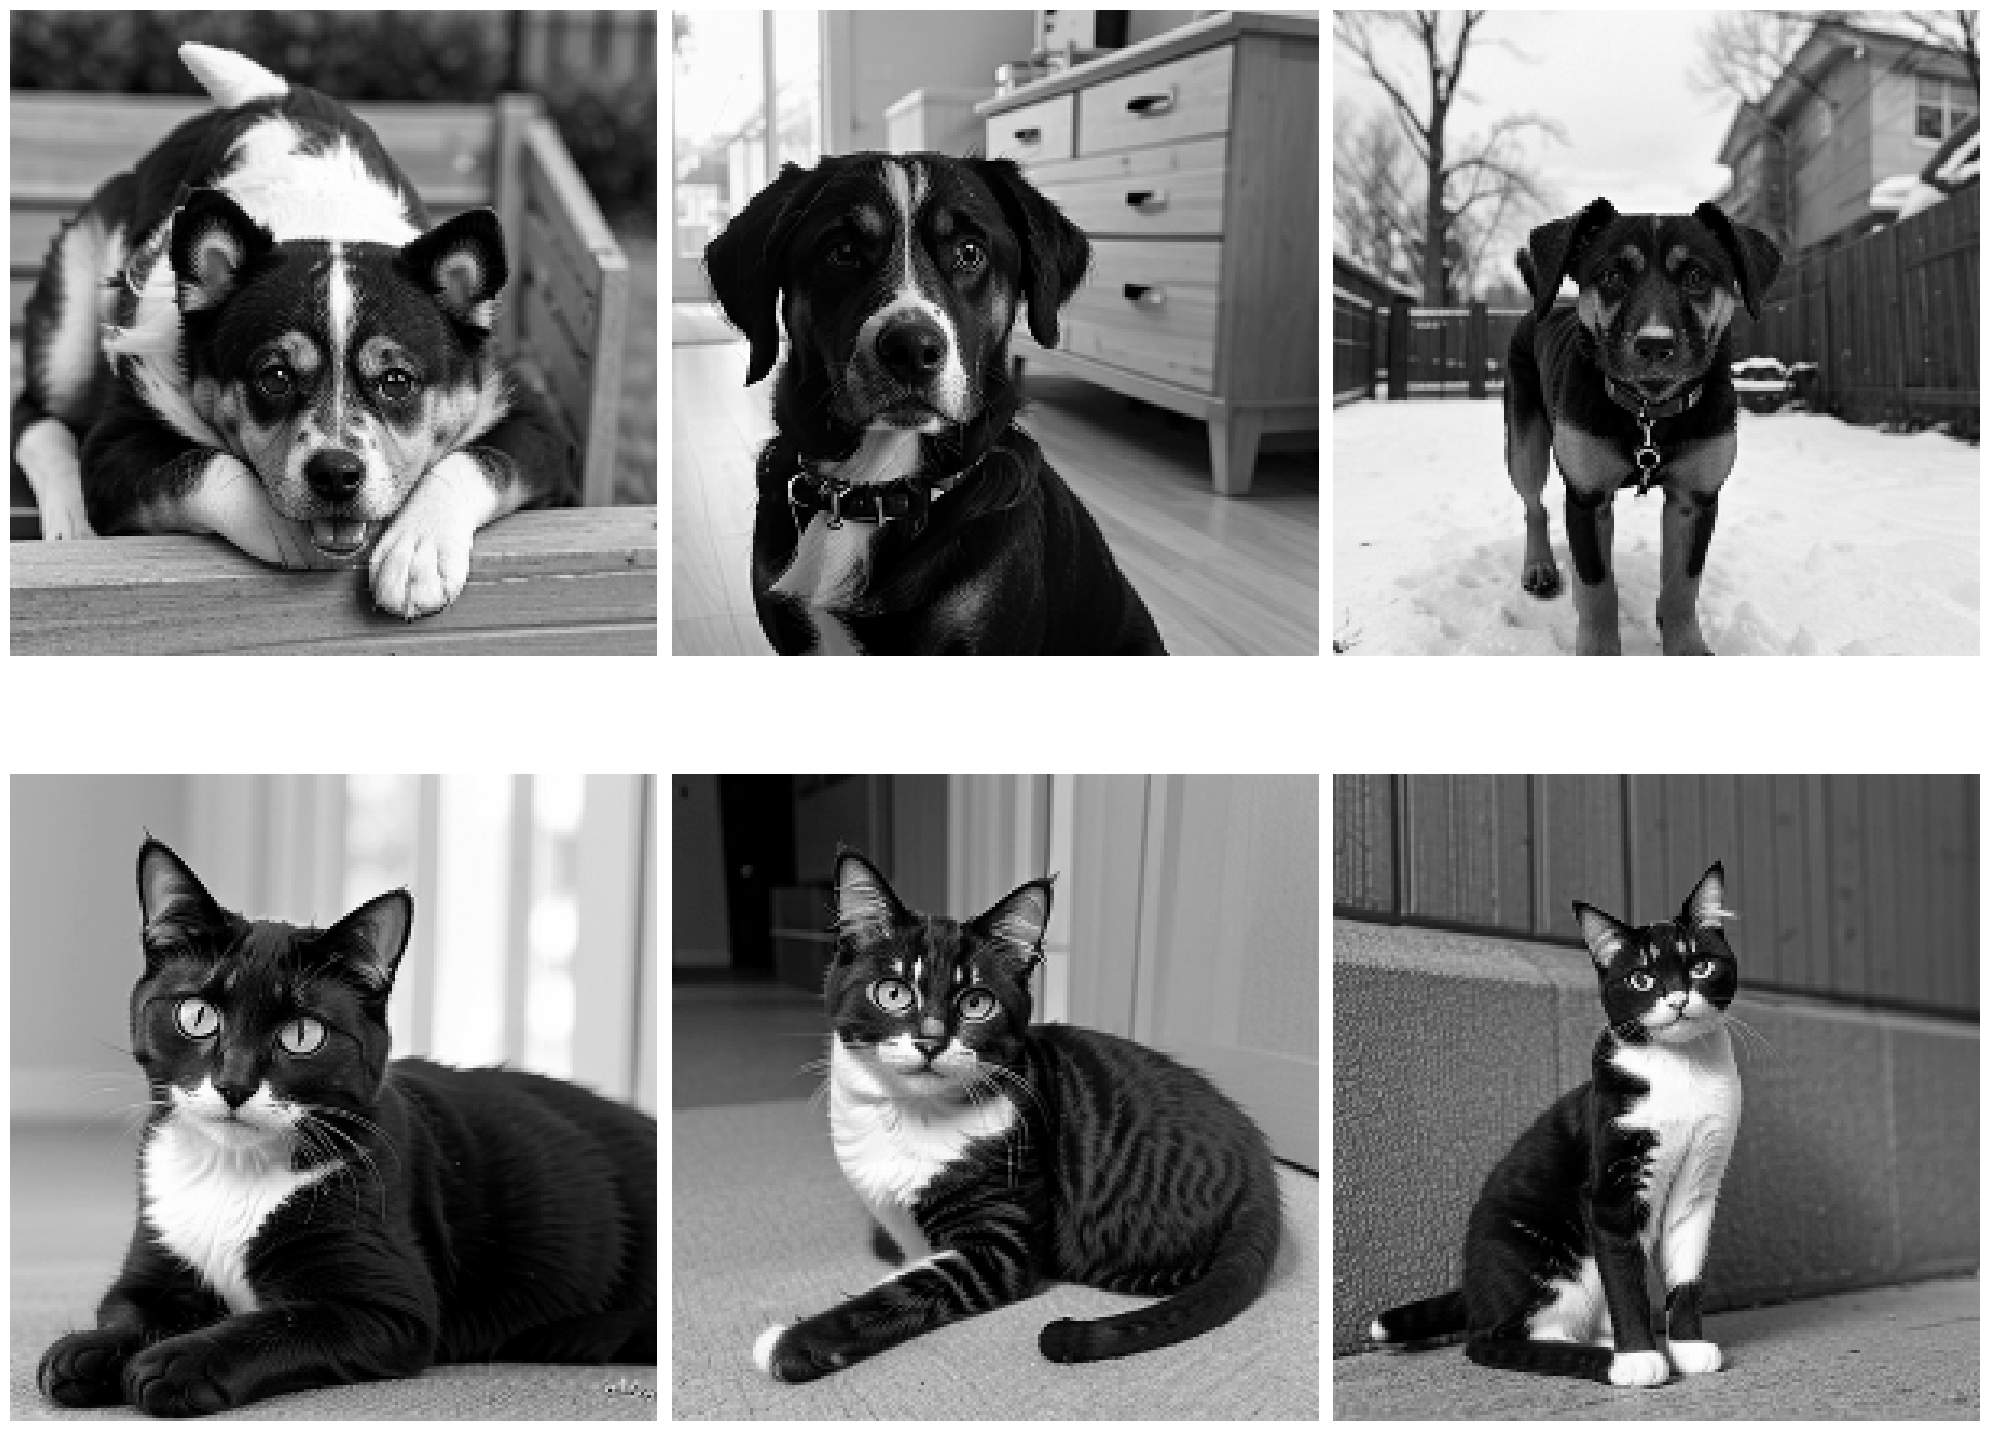

ImagePacker

In [5]:
animals_packed

In [6]:
animals_hog = animals_packed.to_hog(append_label=[1,-1])

In [7]:
animals_df = animals_packed.descriptor_to_df(animals_hog)

In [8]:
train_X, test_X, train_y, test_y = train_test_split(animals_df.iloc[:,:-1], animals_df.iloc[:,-1], test_size=0.2)

In [9]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [10]:
predictions = model.predict(test_X)


In [11]:
f"Accuracy: {accuracy_score(test_y, predictions)*100} %"

'Accuracy: 87.0 %'

In [12]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

          -1       0.82      0.92      0.87        92
           1       0.93      0.82      0.87       108

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [13]:
mat = confusion_matrix(test_y, predictions)

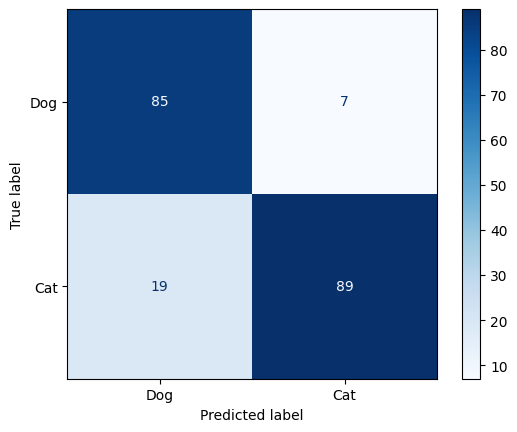

In [14]:
cmd = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['Dog', 'Cat'])
cmd.plot(cmap='Blues')